In [87]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from random import seed
from random import random
seed(57)

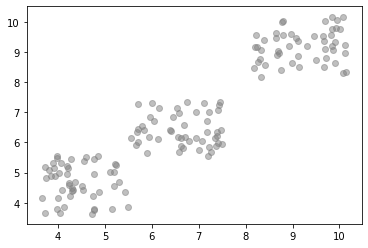

In [92]:
k = 3
samplesPer = 50
var_factor = .2

X=[]
for i in range(0,k):
    sx = random()*10
    sy = random()*10
    for j in range(0,samplesPer):
        x = sx+(random()-.5)*10*var_factor
        y = sx+(random()-.5)*10*var_factor
        X.append([x,y])

X = np.array(X)
plt.scatter(X[:,0], X[:,1], color="grey", alpha = 0.5)

In [96]:
def initialize_clusters(points, k):
    return points[np.random.randint(points.shape[0], size=k)]

def get_distances(centroid, points):
    return np.linalg.norm(points - centroid, axis=1)

In [97]:
iteration = 50

centroids = initialize_clusters(X, k)

classes = np.zeros(X.shape)
distances = np.zeros([X.shape[0],k])

for i in range(iteration):
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, X)
        classes = np.argmin(distances, axis=1)
        for c in range(k):
            centroids[c] = np.mean(X[classes==c] , 0)

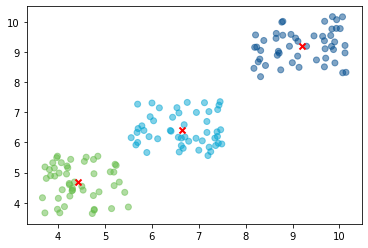

In [98]:
palette = ["#004B8D", "#62BB46", "#00A4D2"]
colors = [palette[j] for j in classes]

plt.scatter(X[:,0], X[:,1], color = colors, alpha = .5)
plt.scatter(centroids[:,0], centroids[:,1], color = "red", marker = "x", lw=2)